In [70]:
import pandas as pd

# Loading the CSV file into a data
data = pd.read_csv('A1-Dataset.csv')

# Displaying basic information about the data
print(data.info())


C:\Users\maxpr\AppData\Local\Temp\ipykernel_33740\1926805932.py:4: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('A1-Dataset.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [71]:
# Getting summary statistics of numeric columns
summary_stats = data.describe()
print(summary_stats)


         Permit Type  Street Number          Unit  Number of Existing Stories  \
count  198900.000000  198900.000000  29479.000000               156116.000000   
mean        7.522323    1121.728944     78.517182                    5.705773   
std         1.457451    1135.768948    326.981324                    8.613455   
min         1.000000       0.000000      0.000000                    0.000000   
25%         8.000000     235.000000      0.000000                    2.000000   
50%         8.000000     710.000000      0.000000                    3.000000   
75%         8.000000    1700.000000      1.000000                    4.000000   
max         8.000000    8400.000000   6004.000000                   78.000000   

       Number of Proposed Stories  Estimated Cost  Revised Cost  \
count               156032.000000    1.608340e+05  1.928340e+05   
mean                     5.745043    1.689554e+05  1.328562e+05   
std                      8.613284    3.630386e+06  3.584903e+06   
mi

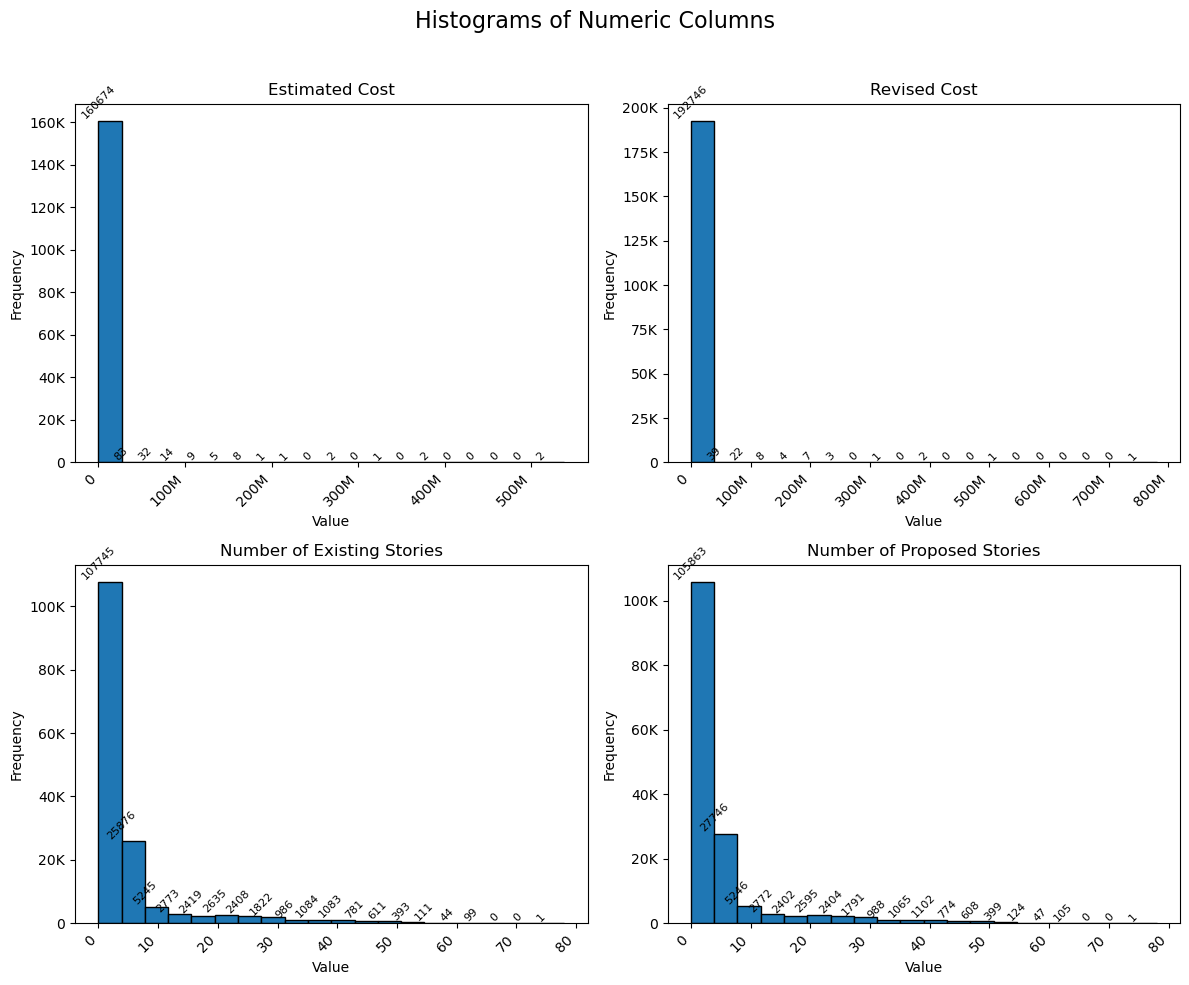

In [72]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Curreny formatter for readability
def currency_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.0f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.0f}K'
    else:
        return f'{x:.0f}' 

# Defining the numeric columns you want to plot
numeric_columns = ['Estimated Cost', 'Revised Cost', 'Number of Existing Stories', 'Number of Proposed Stories']

# Creating a figure and set of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms of Numeric Columns', fontsize=16)

# Flattening axes array for easier iteration
axes = axes.flatten()

# Plotting histograms for each numeric column
for i, col in enumerate(numeric_columns):
    counts, bins, patches = axes[i].hist(data[col], bins=20, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
    # Applying the custom formatter to both x axis and y axis
    axes[i].xaxis.set_major_formatter(FuncFormatter(currency_formatter))
    axes[i].yaxis.set_major_formatter(FuncFormatter(currency_formatter))
    
    # Setting x axis labels to be diagonal
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

    # Adding labels on top of each bar
    for count, bin, patch in zip(counts, bins, patches):
        label = f'{int(count)}'
        axes[i].text(bin, count + 5, label, ha='center', va='bottom', fontsize=8, rotation=45)

# Adjusting layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


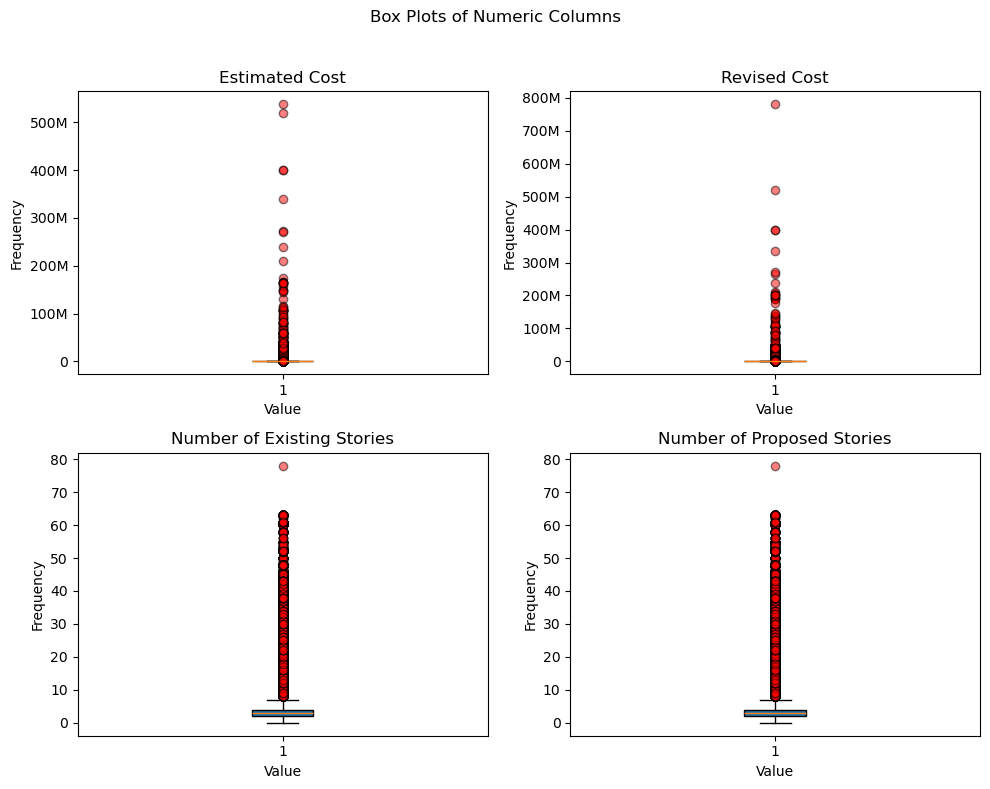

In [73]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def currency_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.0f}M' 
    elif x >= 1_000:
        return f'{x / 1_000:.0f}K'
    else:
        return f'{x:.0f}'

# Creating a figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Box Plots of Numeric Columns')

# Plotting each numeric column in a subplot
for ax, column in zip(axes.flat, numeric_columns):
    # Checking if column exists in the DataFrame
    if column in data.columns:
        # Plotting the box plot
        bp = ax.boxplot(data[column].dropna(), patch_artist=True, flierprops=dict(markerfacecolor='r', marker='o', alpha=0.5))
        
        # Setting labels and title
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        
        # Applying the custom formatter to the y-axis
        ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
    else:
        ax.set_title(f'Column {column} not found')
        ax.set_visible(False)

# Adjusting layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


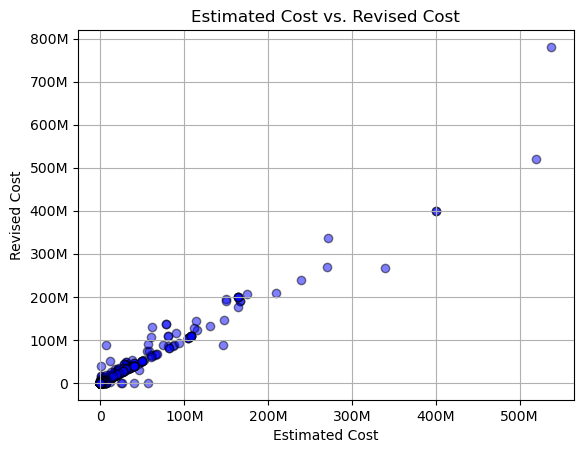

In [74]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def currency_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.0f}M' 
    elif x >= 1_000:
        return f'{x / 1_000:.0f}K'
    else:
        return f'{x:.0f}'

# Scatter plot for Estimated Cost vs. Revised Cost
plt.scatter(data['Estimated Cost'], data['Revised Cost'], alpha=0.5, edgecolor='k', color='b')
plt.xlabel('Estimated Cost')
plt.ylabel('Revised Cost')
plt.title('Estimated Cost vs. Revised Cost')

# Applying the custom formatter to both axes
formatter = FuncFormatter(currency_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()


In [75]:
import pandas as pd

# Function to identify outliers using IQR
def find_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    return outliers

# Finding outliers in Estimated Cost
outliers_estimated_cost = find_outliers('Estimated Cost')

# Calculating total number of entries
total_entries = len(data)

# Calculating number of outliers
num_outliers = len(outliers_estimated_cost)

# Printing the number of outliers as a proportion of total entries
print(f"Number of outliers in 'Estimated Cost': {num_outliers} out of {total_entries} entries ({(num_outliers / total_entries) * 100:.2f}%)")
print("Outliers in Estimated Cost:")
print(outliers_estimated_cost)


Number of outliers in 'Estimated Cost': 20708 out of 198900 entries (10.41%)
Outliers in Estimated Cost:
       Permit Number  Permit Type            Permit Type Definition  \
4        2.01611E+11            6                       demolitions   
21       2.01708E+11            8            otc alterations permit   
22       2.01708E+11            3  additions alterations or repairs   
83       2.01712E+11            1                  new construction   
89       2.01712E+11            3  additions alterations or repairs   
...              ...          ...                               ...   
198839   2.01802E+11            8            otc alterations permit   
198851   2.01504E+11            3  additions alterations or repairs   
198852   2.01504E+11            2       new construction wood frame   
198857   2.01802E+11            8            otc alterations permit   
198890   2.01711E+11            3  additions alterations or repairs   

       Permit Creation Date Block Lot  Str

In [76]:
import pandas as pd

# Defining the column names for different attribute types
numerical_columns = []
categorical_columns = [
    'Permit Type',
    'Current Status',
    'Structural Notification',
    'Fire Only Permit',
    'Existing Use',
    'Proposed Use',
    'Existing Construction Type',
    'Existing Construction Type Description',
    'Proposed Construction Type',
    'Proposed Construction Type Description',
    'Site Permit',
    'Neighborhoods - Analysis Boundaries',
    'Zipcode',
    'Permit Type Definition',
    'Street Name'
]
text_columns = ['Description']
spatial_columns = [
    'Location'
]
time_series_columns = [
    'Permit Creation Date',
    'Current Status Date',
    'Filed Date',
    'Issued Date',
    'First Construction Document Date',
    'Completed Date',
    'Permit Expiration Date'
]

# Converting the specified columns to datetime
for col in time_series_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Identifing column types dynamically
for column in data.columns:
    if column in time_series_columns:
        continue  
    if column in categorical_columns:
        continue  
    if column in spatial_columns:
        continue 
    if pd.api.types.is_numeric_dtype(data[column]):
        numerical_columns.append(column)
    elif isinstance(data[column].dtype, pd.CategoricalDtype):
        categorical_columns.append(column)
    elif pd.api.types.is_string_dtype(data[column]):
        text_columns.append(column)
    elif "latitude" in column.lower() or "longitude" in column.lower() or "coord" in column.lower():
        spatial_columns.append(column)
    elif pd.api.types.is_datetime64_any_dtype(data[column]):
        time_series_columns.append(column) 

# Ensuring explicitly defined time-series columns are included and exist
time_series_columns = [col for col in time_series_columns if col in data.columns]

# Creating separate DataFrames for each attribute type
numerical_df = data[numerical_columns] if numerical_columns else pd.DataFrame()
categorical_df = data[categorical_columns] if categorical_columns else pd.DataFrame()
text_df = data[text_columns] if text_columns else pd.DataFrame()
spatial_df = data[spatial_columns] if spatial_columns else pd.DataFrame()
time_series_df = data[time_series_columns] if time_series_columns else pd.DataFrame()

# Saving DataFrames to CSV files
numerical_df.to_csv('numerical_data.csv', index=False)
categorical_df.to_csv('categorical_data.csv', index=False)
text_df.to_csv('text_data.csv', index=False)
spatial_df.to_csv('spatial_data.csv', index=False)
time_series_df.to_csv('time_series_data.csv', index=False)

# Displaying the DataFrames
print("Numerical DataFrame:")
print(numerical_df.head())
print("\nCategorical DataFrame:")
print(categorical_df.head())
print("\nText DataFrame:")
print(text_df.head())
print("\nSpatial DataFrame:")
print(spatial_df.head())
print("\nTime-Series DataFrame:")
print(time_series_df.head())


Numerical DataFrame:
   Street Number  Unit  Number of Existing Stories  \
0            140   NaN                         6.0   
1            440   0.0                         7.0   
2           1647   NaN                         6.0   
3           1230   0.0                         2.0   
4            950   NaN                         3.0   

   Number of Proposed Stories  Estimated Cost  Revised Cost  Existing Units  \
0                         NaN          4000.0        4000.0           143.0   
1                         NaN             1.0         500.0             NaN   
2                         6.0         20000.0           NaN            39.0   
3                         2.0          2000.0        2000.0             1.0   
4                         NaN        100000.0      100000.0             NaN   

   Proposed Units  Plansets  Supervisor District     Record ID  
0             NaN       2.0                  3.0  1.380610e+12  
1             NaN       2.0                  3.0 

In [77]:
# Detecting missing data
def detect_missing_data(df):
    missing_data = df.isnull().sum()
    return missing_data[missing_data > 0] 

# Displaying missing data for each DataFrame
print("Missing Data in Numerical DataFrame:")
print(detect_missing_data(numerical_df))
print("\nMissing Data in Categorical DataFrame:")
print(detect_missing_data(categorical_df))
print("\nMissing Data in Text DataFrame:")
print(detect_missing_data(text_df))
print("\nMissing Data in Spatial DataFrame:")
print(detect_missing_data(spatial_df))
print("\nMissing Data in Time-Series DataFrame:")
print(detect_missing_data(time_series_df))

Missing Data in Numerical DataFrame:
Unit                          169421
Number of Existing Stories     42784
Number of Proposed Stories     42868
Estimated Cost                 38066
Revised Cost                    6066
Existing Units                 51538
Proposed Units                 50911
Plansets                       37309
Supervisor District             1717
dtype: int64

Missing Data in Categorical DataFrame:
Structural Notification                   191978
Fire Only Permit                          180073
Existing Use                               41114
Proposed Use                               42439
Existing Construction Type                 43366
Existing Construction Type Description     43366
Proposed Construction Type                 43162
Proposed Construction Type Description     43162
Site Permit                               193541
Neighborhoods - Analysis Boundaries         1725
Zipcode                                     1716
dtype: int64

Missing Data in Text Dat

In [78]:
import pandas as pd

# Dropping rows with missing Location in spatial data
spatial_df = spatial_df.dropna(subset=['Location'])

# Dropping rows with missing Description in text data
text_df = text_df.dropna(subset=['Description'])

# Imputing missing values in numerical data with the median of each column
numerical_df = numerical_df.fillna(numerical_df.median())

# Imputing missing values in categorical data with the mode (most frequent value) of each column
categorical_df = categorical_df.apply(lambda x: x.fillna(x.mode()[0]))

# Dropping rows with any missing values in time-series columns
time_series_df = time_series_df.dropna()

# Verifing the result
print("Spatial DataFrame after Dropping Missing Data:")
print(spatial_df.head())

print("\nText DataFrame after Dropping Missing Data:")
print(text_df.head())

print("\nNumerical DataFrame after Imputation with Median:")
print(numerical_df.head())

print("\nCategorical DataFrame after Imputation with Mode:")
print(categorical_df.head())

print("\nTime-Series DataFrame after Dropping Missing Data:")
print(time_series_df.head())


Spatial DataFrame after Dropping Missing Data:
                                    Location
0  (37.785719256680785, -122.40852313194863)
1   (37.78733980600732, -122.41063199757738)
2    (37.7946573324287, -122.42232562979227)
3   (37.79595867909168, -122.41557405519474)
4   (37.78315261897309, -122.40950883997789)

Text DataFrame after Dropping Missing Data:
                                         Description Permit Number Block  Lot
0  ground fl facade: to erect illuminated, electr...   2.01505E+11   326   23
1            remove (e) awning and associated signs.   2.01604E+11   306    7
2                    installation of separating wall   2.01605E+11   595  203
3           repair dryrot & stucco at front of bldg.   2.01611E+11   156   11
4  demolish retail/office/commercial 3-story buil...   2.01611E+11   342    1

Numerical DataFrame after Imputation with Median:
   Street Number  Unit  Number of Existing Stories  \
0            140   0.0                         6.0   
1          

In [79]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import download

# Downloading required NLTK data
download('stopwords')
download('punkt')
download('wordnet')

# Initializing NLP tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Functioning to pre-process text data
def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Stem or Lemmatize
    # tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    # Join tokens back to string
    return ' '.join(tokens)

# Pre-processing text data
for column in text_columns:
    if column in text_df.columns:
        text_df[column] = text_df[column].astype(str).apply(preprocess_text)

# Verifing the result
print("Text DataFrame after Pre-Processing:")
print(text_df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxpr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxpr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxpr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text DataFrame after Pre-Processing:
                                         Description Permit Number Block  Lot
0  ground fl facade erect illuminated electric wa...     201505e11   326   23
1                    remove e awning associated sign     201604e11   306    7
2                       installation separating wall     201605e11   595  203
3                    repair dryrot stucco front bldg     201611e11   156   11
4    demolish retailofficecommercial 3story building     201611e11   342    1


In [80]:
import pandas as pd

# Converting columns to datetime
time_series_df['Issued Date'] = pd.to_datetime(time_series_df['Issued Date'], errors='coerce')
time_series_df['First Construction Document Date'] = pd.to_datetime(time_series_df['First Construction Document Date'], errors='coerce')
time_series_df['Completed Date'] = pd.to_datetime(time_series_df['Completed Date'], errors='coerce')
time_series_df['Permit Expiration Date'] = pd.to_datetime(time_series_df['Permit Expiration Date'], errors='coerce')

# Functioning to extract date features
def extract_date_features(df, date_column):
    df[f'{date_column}_Year'] = df[date_column].dt.year
    df[f'{date_column}_Month'] = df[date_column].dt.month
    df[f'{date_column}_Day'] = df[date_column].dt.day
    df[f'{date_column}_Weekday'] = df[date_column].dt.weekday
    df[f'{date_column}_Day_of_Year'] = df[date_column].dt.dayofyear
    df[f'{date_column}_Is_Weekend'] = df[date_column].dt.weekday >= 5
    return df

# Appling feature extraction to each date column
date_columns = [
    'Issued Date',
    'First Construction Document Date',
    'Completed Date',
    'Permit Expiration Date'
]

for column in date_columns:
    time_series_df = extract_date_features(time_series_df, column)

# Verifing the result
print("Time-Series DataFrame after Extracting Date Features:")
print(time_series_df.head())


Time-Series DataFrame after Extracting Date Features:
   Permit Creation Date Current Status Date Filed Date Issued Date  \
3            2016-11-07          2017-07-24 2016-11-07  2017-07-18   
6            2017-06-30          2017-07-12 2017-06-30  2017-06-30   
48           2017-10-11          2017-10-31 2017-10-11  2017-10-11   
91           2014-07-08          2017-09-08 2014-07-08  2015-09-11   
92           2014-08-25          2017-10-04 2014-08-25  2014-08-25   

   First Construction Document Date Completed Date Permit Expiration Date  \
3                        2017-07-18     2017-07-24             2018-07-13   
6                        2017-06-30     2017-07-12             2018-06-25   
48                       2017-10-11     2017-10-31             2018-04-11   
91                       2015-09-11     2017-09-08             2016-09-05   
92                       2014-08-25     2017-10-04             2015-08-20   

    Issued Date_Year  Issued Date_Month  Issued Date_Day  ... 

In [81]:
import pandas as pd


# One-Hot Encoding
one_hot_encoded_df = categorical_df.copy()
one_hot_encoded_df = pd.get_dummies(one_hot_encoded_df, columns=categorical_columns, drop_first=True)

# Verifing the result
print("One-Hot Encoded DataFrame:")
print(one_hot_encoded_df.head())


One-Hot Encoded DataFrame:
   Permit Type_2  Permit Type_3  Permit Type_4  Permit Type_5  Permit Type_6  \
0          False          False           True          False          False   
1          False          False           True          False          False   
2          False           True          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False           True   

   Permit Type_7  Permit Type_8  Current Status_approved  \
0          False          False                    False   
1          False          False                    False   
2          False          False                    False   
3          False           True                    False   
4          False          False                    False   

   Current Status_cancelled  Current Status_complete  ...  \
0                     False                    False  ...   
1        

In [82]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Initializing scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Creating copies of the DataFrame for each scaling method
min_max_scaled_df = numerical_df.copy()
standard_scaled_df = numerical_df.copy()
robust_scaled_df = numerical_df.copy()

# Appling Min-Max Scaling
min_max_scaled_df[numerical_columns] = min_max_scaler.fit_transform(numerical_df[numerical_columns])

print("Min-Max Scaled DataFrame:")
print(min_max_scaled_df.head())

# Appling Standardization
standard_scaled_df[numerical_columns] = standard_scaler.fit_transform(numerical_df[numerical_columns])

print("Standardized DataFrame:")
print(standard_scaled_df.head())

# Appling Robust Scaling
robust_scaled_df[numerical_columns] = robust_scaler.fit_transform(numerical_df[numerical_columns])

print("Robust Scaled DataFrame:")
print(robust_scaled_df.head())


Min-Max Scaled DataFrame:
   Street Number  Unit  Number of Existing Stories  \
0       0.016667   0.0                    0.076923   
1       0.052381   0.0                    0.089744   
2       0.196071   0.0                    0.076923   
3       0.146429   0.0                    0.025641   
4       0.113095   0.0                    0.038462   

   Number of Proposed Stories  Estimated Cost  Revised Cost  Existing Units  \
0                    0.038462        0.000007  5.124920e-06        0.074987   
1                    0.038462        0.000000  6.406150e-07        0.000524   
2                    0.076923        0.000037  8.968610e-06        0.020451   
3                    0.025641        0.000004  2.562460e-06        0.000524   
4                    0.038462        0.000186  1.281230e-04        0.000524   

   Proposed Units  Plansets  Supervisor District  Record ID  
0        0.001047  0.000222                  0.2   0.920742  
1        0.001047  0.000222                  0.2  

In [83]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting and transforming the text data
X_tfidf = tfidf_vectorizer.fit_transform(text_df['Description']) 

# Sparsing matrix is already memory efficient, no conversion needed
print("TF-IDF Sparse Matrix Shape:", X_tfidf.shape)

from sklearn.decomposition import TruncatedSVD

# Initializing TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=1000) 
X_reduced = svd.fit_transform(X_tfidf)

# Converting reduced matrix to DataFrame
reduced_df = pd.DataFrame(X_reduced)

print("Reduced DataFrame Shape:", reduced_df.shape)


TF-IDF Sparse Matrix Shape: (198610, 98969)
Reduced DataFrame Shape: (198610, 1000)


In [84]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  
X_bow = vectorizer.fit_transform(text_df['Description'])  

# Converting to DataFrame for easier manipulation
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

print("Bag of Words DataFrame:")
print(bow_df.head())


Bag of Words DataFrame:
   02913  032  04  040  10  100  10th  11  11th  12  ...  within  without  \
0      0    0   0    0   0    0     0   0     0   0  ...       0        0   
1      0    0   0    0   0    0     0   0     0   0  ...       0        0   
2      0    0   0    0   0    0     0   0     0   0  ...       0        0   
3      0    0   0    0   0    0     0   0     0   0  ...       0        0   
4      0    0   0    0   0    0     0   0     0   0  ...       0        0   

   wmta  wnew  wnov  wood  woodclad  wooden  work  yard  
0     0     0     0     0         0       0     0     0  
1     0     0     0     0         0       0     0     0  
2     0     0     0     0         0       0     0     0  
3     0     0     0     0         0       0     0     0  
4     0     0     0     0         0       0     0     0  

[5 rows x 1000 columns]


In [85]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Initializing the TfidfVectorizer with a limited number of features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
X_tfidf = tfidf_vectorizer.fit_transform(text_df['Description'])  

# Appling TruncatedSVD for dimensionality reduction if not already done
svd = TruncatedSVD(n_components=100)  
X_reduced = svd.fit_transform(X_tfidf)

# Converting to DataFrame for easier manipulation
tfidf_df = pd.DataFrame(X_reduced)

print("TF-IDF DataFrame:")
print(tfidf_df.head())


TF-IDF DataFrame:
         0         1         2         3         4         5         6   \
0  0.002398  0.003159  0.153744 -0.066005  0.013679  0.156328  0.001993   
1  0.000859  0.000288  0.049559 -0.024223 -0.003775  0.002596  0.008477   
2  0.001394  0.000239  0.092496 -0.046252 -0.008339  0.014527 -0.004251   
3  0.005405  0.000327  0.077977 -0.038219 -0.027026 -0.088596  0.117893   
4  0.000579  0.000141  0.024185 -0.010006  0.002508  0.010247  0.025572   

         7         8         9   ...        90        91        92        93  \
0 -0.073808 -0.023333 -0.276007  ... -0.024051 -0.019837 -0.000885 -0.027632   
1 -0.028533 -0.004605 -0.121793  ... -0.017839 -0.002391  0.005005 -0.007592   
2 -0.003886  0.006099 -0.130908  ... -0.027528 -0.047119  0.006651 -0.059268   
3 -0.133217  0.272985 -0.033505  ...  0.062619 -0.033432 -0.106338  0.000848   
4 -0.012656  0.018847 -0.001739  ... -0.009599  0.037548 -0.028969 -0.018110   

         94        95        96        97        9

In [86]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data[['latitude', 'longitude']] = pd.DataFrame(data['Location'].apply(lambda x: eval(x) if pd.notnull(x) else (None, None)).tolist(), index=data.index)

print("Data with Latitude and Longitude:")
print(data[['Location', 'latitude', 'longitude']].head())



# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Normalizing latitude and longitude
data[['latitude', 'longitude']] = scaler.fit_transform(data[['latitude', 'longitude']])

print("Normalized Latitude and Longitude:")
print(data[['latitude', 'longitude']].head())


Data with Latitude and Longitude:
                                    Location   latitude   longitude
0  (37.785719256680785, -122.40852313194863)  37.785719 -122.408523
1   (37.78733980600732, -122.41063199757738)  37.787340 -122.410632
2    (37.7946573324287, -122.42232562979227)  37.794657 -122.422326
3   (37.79595867909168, -122.41557405519474)  37.795959 -122.415574
4   (37.78315261897309, -122.40950883997789)  37.783153 -122.409509
Normalized Latitude and Longitude:
   latitude  longitude
0  0.663686   0.705894
1  0.677555   0.691359
2  0.740180   0.610760
3  0.751317   0.657296
4  0.641720   0.699100


In [87]:
import numpy as np
numerical_df = numerical_df.reset_index(drop=True)
categorical_df = categorical_df.reset_index(drop=True)
text_df = text_df.reset_index(drop=True)
time_series_df = time_series_df.reset_index(drop=True)
spatial_df = spatial_df.reset_index(drop=True)

# Concatenating all data frames along columns
final_df = pd.concat([numerical_df, categorical_df, text_df, time_series_df, spatial_df], axis=1)

print("Final Transformed Dataset:")
print(final_df.head())

# Saving to a CSV file
final_df.to_csv('final_transformed_dataset.csv', index=False)

print("Final dataset saved as 'final_transformed_dataset.csv'")

# Summarizing statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(final_df.describe(include=[np.number]))



Final Transformed Dataset:
   Street Number  Unit  Number of Existing Stories  \
0            140   0.0                         6.0   
1            440   0.0                         7.0   
2           1647   0.0                         6.0   
3           1230   0.0                         2.0   
4            950   0.0                         3.0   

   Number of Proposed Stories  Estimated Cost  Revised Cost  Existing Units  \
0                         3.0          4000.0        4000.0           143.0   
1                         3.0             1.0         500.0             1.0   
2                         6.0         20000.0        7000.0            39.0   
3                         2.0          2000.0        2000.0             1.0   
4                         3.0        100000.0      100000.0             1.0   

   Proposed Units  Plansets  Supervisor District  ...  Completed Date_Weekday  \
0             2.0       2.0                  3.0  ...                     0.0   
1          

In [88]:
# Data types of each column
print("\nData Types of Each Column:")
print(final_df.dtypes)



Data Types of Each Column:
Street Number                           int64
Unit                                  float64
Number of Existing Stories            float64
Number of Proposed Stories            float64
Estimated Cost                        float64
                                       ...   
Permit Expiration Date_Day            float64
Permit Expiration Date_Weekday        float64
Permit Expiration Date_Day_of_Year    float64
Permit Expiration Date_Is_Weekend      object
Location                               object
Length: 62, dtype: object
